In [344]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load original image

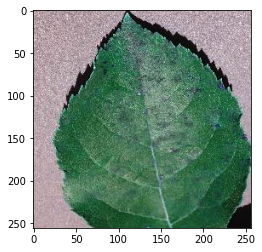

In [345]:
file_path = 'Plant_leaf_diseases_dataset_with_augmentation/Plant_leave_diseases_dataset_with_augmentation/Apple___Apple_scab/image (5).JPG'
img = cv2.imread(file_path, -1)
plt.imshow(img)

Random background pixel -> [177 157 162]


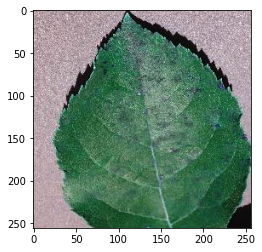

In [346]:
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

# define range of shadow color in HSV
# shaded areas usually have high H and S, while V is smaller
upper_shadow = np.array([360,360,55])
lower_shadow = np.array([20,20,0])

# Threshold the HSV image to get only shadow colors
mask = cv2.inRange(hsv, lower_shadow, upper_shadow)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(img, img, mask= mask)
plt.imshow(img)

print("Random background pixel ->", img[10,10])

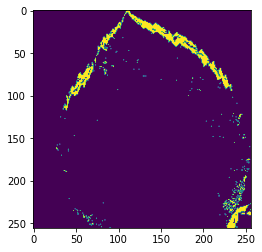

In [347]:
plt.imshow(mask)

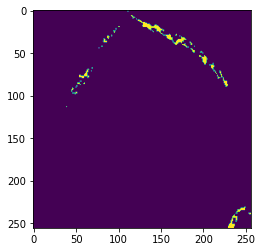

In [348]:
# erosion (remove points inside the leaf surface)
kernel = np.ones((3,3), np.uint8)
eroded_mask = cv2.erode(mask, kernel, iterations=1)
plt.imshow(eroded_mask)

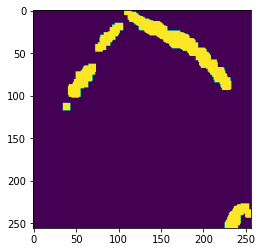

In [349]:
# dilation (expand the shaded region)
kernel = np.ones((9,9), np.uint8)
dilated_mask = cv2.dilate(eroded_mask, kernel, iterations=1)
plt.imshow(dilated_mask)

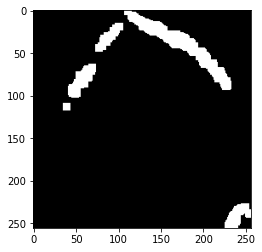

In [350]:
res = cv2.cvtColor(dilated_mask,cv2.COLOR_BGR2RGB)
plt.imshow(res)

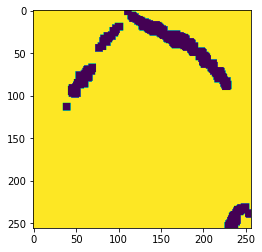

In [351]:
res_gray = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY)
ret_otsu,im_bw_otsu = cv2.threshold(res_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu)

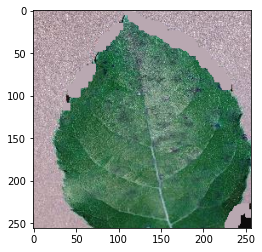

In [352]:
# substitute shadows for background pixels
for y in range(len(img)):
    for x in range(len(img)):
        if(im_bw_otsu[y, x] == 0):
            img[y, x] = [185, 168, 177] # random backgroung pixel to substitute the shadow
plt.imshow(img)

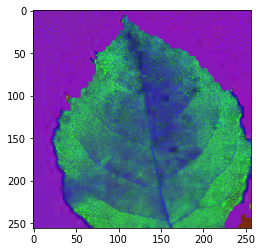

In [353]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

Alternative filters

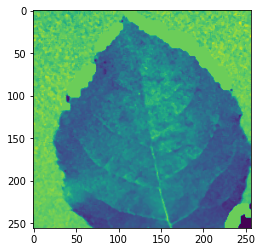

In [354]:
main_img = cv2.imread(file_path)
gray_scale_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    
# Explore alternative filters

blur = cv2.medianBlur(gray_scale_img,3) # used to remove salt-and-pepper noise
plt.imshow(blur)

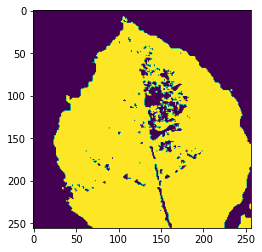

In [355]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu)

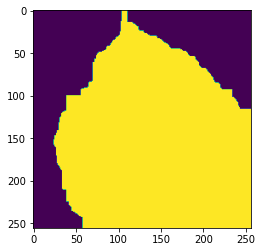

In [356]:
kernel = np.ones((25,25),np.uint8)

# Closing the small holes
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

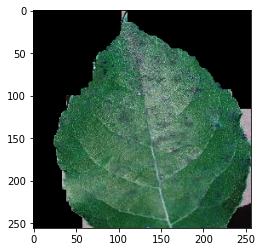

In [357]:
current_frame = main_img
filtered_image = closing/255

#Elementwise Multiplication of range bounded filtered_image with current_frame
current_frame[0:current_frame.shape[0], 0:current_frame.shape[1], 0] = np.multiply(current_frame[0:current_frame.shape[0], 0:current_frame.shape[1], 0], filtered_image) #B channel
current_frame[0:current_frame.shape[0], 0:current_frame.shape[1], 1] = np.multiply(current_frame[0:current_frame.shape[0], 0:current_frame.shape[1], 1], filtered_image) #G channel
current_frame[0:current_frame.shape[0], 0:current_frame.shape[1], 2] = np.multiply(current_frame[0:current_frame.shape[0], 0:current_frame.shape[1], 2], filtered_image) #R channel

img_without_shadow = current_frame
plt.imshow(img_without_shadow)